In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

My questions:
- How has use of the public water supply been over time? Relationship with different water sources?
- How much water is used for agriculture in Michigan (livestock and irrigation)? Relationship with different water sources?

Counties of interest:
* Oakland
* Ingham
* Wayne

In [2]:
# Delete / close the two below... only open for beginning analyssi

In [3]:
data = pd.read_csv('water_use_data_2013_to_2022.csv')
data

,Unnamed: 0,county,gallons_from_great_lakes,gallons_from_groundwater,gallons_from_inland_surface,total_gallons_all_sources,industry,year
0,0,Alcona,0,2666085962,4695086047,7361172009,Total All Sectors,2014
1,1,Alger,1512160000,1608226431,799089999,3919476431,Total All Sectors,2014
2,2,Allegan,0,5552539983,3784550040,9337090023,Total All Sectors,2014
3,3,Alpena,40839120000,10948600250,2532270000,54319990250,Total All Sectors,2014
4,4,Antrim,0,12214548686,54526097,12269074783,Total All Sectors,2014
...,...,...,...,...,...,...,...,...
6625,6635,Tuscola,0,658988599,0,658988599,Public Water Supply,2020
6626,6636,Van Buren,590738000,736881910,0,1327619910,Public Water Supply,2020
6627,6637,Washtenaw,0,2164843830,3929644350,6094488180,Public Water Supply,2020
6628,6638,Wayne,161178737000,0,0,161178737000,Public Water Supply,2020


In [4]:
data['industry'].value_counts()

Total All Sectors            830
Commercial-Institutional     830
Electric Power Generation    830
Irrigation                   830
Livestock                    830
Other                        830
Public Water Supply          830
Industrial-Manufacturing     820
Name: industry, dtype: int64

# Overall Water Usage
Overall water usage for the 3 counties specified. Will be achieved through the `industy` variable with the tag, `Total All Sectors`.

Create dataframes focusing on each county.

In [5]:
oakland=data[data['county']=='Oakland']
ingham=data[data['county']=='Ingham']
wayne=data[data['county']=='Wayne']

### *Oakland County*

In [6]:
oakland_tas = oakland[oakland['industry']=="Total All Sectors"].sort_values('year')
oakland_tas.iloc[:,[2,3,4,5,7]]

,gallons_from_great_lakes,gallons_from_groundwater,gallons_from_inland_surface,total_gallons_all_sources,year
4036,0,9181829538,2954850633,12136680171,2013
62,0,1943882167,4577966074,6521848241,2014
726,0,8515904424,863749385,9379653809,2015
3372,0,12982580344,5597752859,18580333203,2016
5364,0,11818456173,5713426408,17531882581,2017
1380,0,10041027007,4930275626,14971302633,2018
4700,0,9171122298,4611794135,13782916433,2019
6028,0,11571020032,4695424051,16266444083,2020
2044,0,12011408620,4714132226,16725540846,2021
2708,0,10525574310,4317873500,14843447810,2022


Text(0.5, 1.0, 'Gallons of Water used in Oakland County (in 10 Billions)')

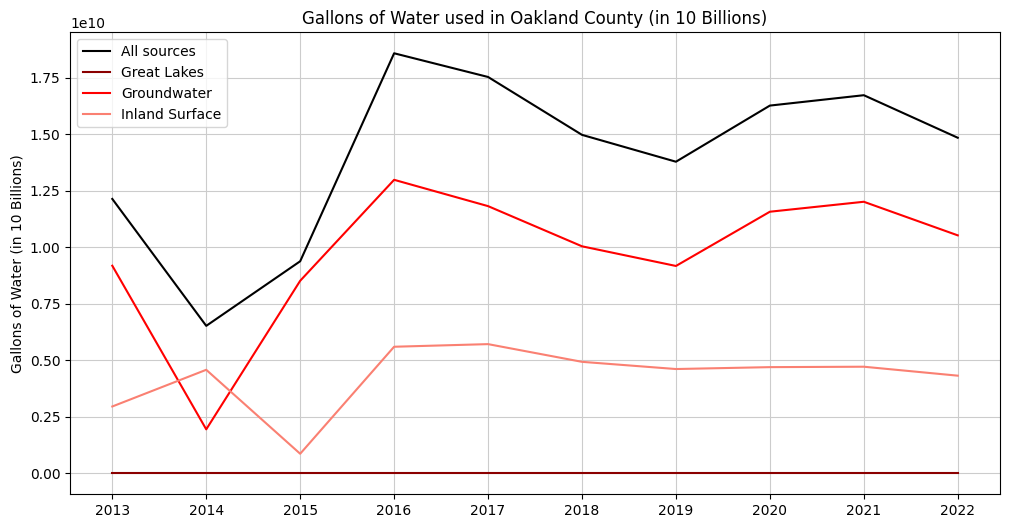

In [67]:
# Oakland plot
plt.figure(figsize=(12,6))
plt.plot(oakland_tas['year'], oakland_tas['total_gallons_all_sources'], label='All sources', c='black')
plt.plot(oakland_tas['year'], oakland_tas['gallons_from_great_lakes'], label='Great Lakes', c='darkred')
plt.plot(oakland_tas['year'], oakland_tas['gallons_from_groundwater'], label='Groundwater', c='red')
plt.plot(oakland_tas['year'], oakland_tas['gallons_from_inland_surface'], label='Inland Surface', c='salmon')

plt.xticks(oakland_tas['year'])
plt.grid(c='0.8')
plt.legend()
plt.ylabel('Gallons of Water (in 10 Billions)')
plt.title('Gallons of Water used in Oakland County (in 10 Billions)')

**Oakland County** does not use any water from the Great Lakes. With the exception of 2014, *Groundwater* is the main supplier. Inland Surface sources are also used, with values roughly half of a given year's groundwater value.

### *Ingham County*

In [8]:
ingham_tas = ingham[ingham['industry']=="Total All Sectors"].sort_values('year')
ingham_tas.iloc[:,[2,3,4,5,7]]

,gallons_from_great_lakes,gallons_from_groundwater,gallons_from_inland_surface,total_gallons_all_sources,year
4006,0,11788116884,27364552161,39152669046,2013
32,0,945870565,28484094909,29429965474,2014
696,0,9738519412,27517274164,37255793576,2015
3342,0,11633944070,36856031007,48489975077,2016
5334,0,11596130601,30981072606,42577203207,2017
1350,0,12421038254,36181892049,48602930303,2018
4670,0,11955908020,7955763368,19911671388,2019
5998,0,11205788317,5605903848,16811692165,2020
2014,0,9638514208,80937307,9719451515,2021
2678,0,9603122654,146462541,9749585195,2022


Text(0.5, 1.0, 'Gallons of Water used in Ingham County (in 10 Billions)')

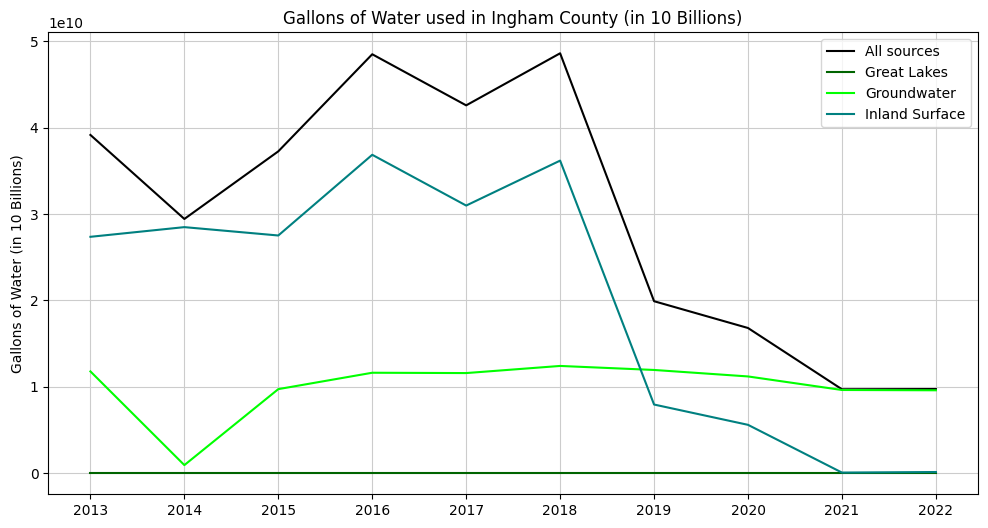

In [72]:
plt.figure(figsize=(12,6))
plt.plot(ingham_tas['year'], ingham_tas['total_gallons_all_sources'], label='All sources', c='black')
plt.plot(ingham_tas['year'], ingham_tas['gallons_from_great_lakes'], label='Great Lakes', c='darkgreen')
plt.plot(ingham_tas['year'], ingham_tas['gallons_from_groundwater'], label='Groundwater', c='lime')
plt.plot(ingham_tas['year'], ingham_tas['gallons_from_inland_surface'], label='Inland Surface', c='teal')

plt.xticks(ingham_tas['year'])
plt.grid(c='0.8')
plt.legend()
plt.ylabel('Gallons of Water (in 10 Billions)')
plt.title('Gallons of Water used in Ingham County (in 10 Billions)')

As with Oakland County, **Ingham County** does not source water from the Great Lakes. Rather, they primarily source from *Inland* sources, which closely correlates with the overall trend marked in blue.

### *Wayne County*

In [10]:
wayne_tas = wayne[wayne['industry']=="Total All Sectors"].sort_values('year')
wayne_tas.iloc[:,[2,3,4,5,7]]

,gallons_from_great_lakes,gallons_from_groundwater,gallons_from_inland_surface,total_gallons_all_sources,year
4055,517783919184,647065659,114056952728,632487937571,2013
81,303478413313,671360559,97212675498,401362449370,2014
745,419374257939,148515687,66409921371,485932694997,2015
3391,415168028543,846778139,153423431341,569438238023,2016
5383,399842042554,838474031,162050236505,562730753090,2017
1399,373596175424,754894482,144705306530,519056376436,2018
4719,367966025893,805290741,150775532876,519546849510,2019
6047,327371031816,812944641,150181447681,478365424138,2020
2063,271373104670,748708165,119530509685,391652322520,2021
2727,254632223903,842901101,136048131346,391523256350,2022


Text(0.5, 1.0, 'Gallons of Water used in Wayne County (in 100 Billions)')

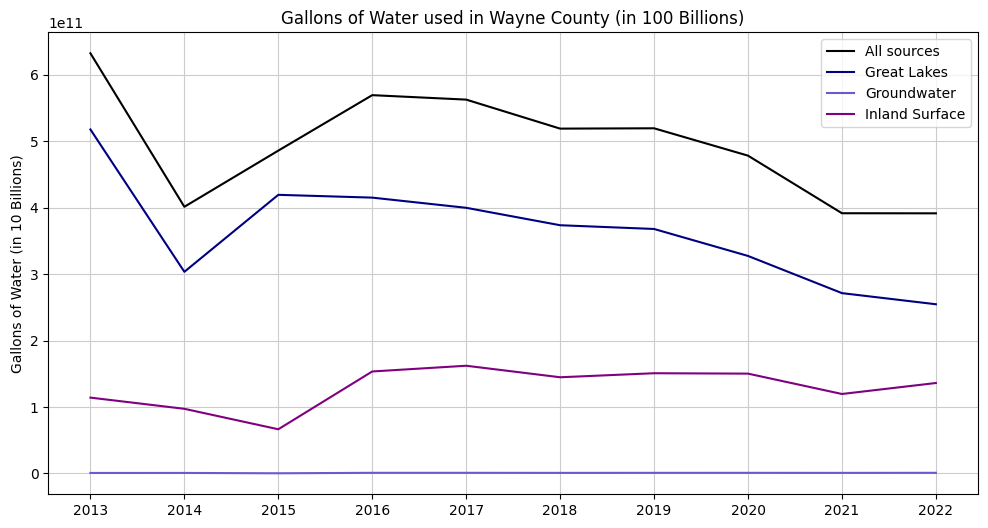

In [74]:
plt.figure(figsize=(12,6))
plt.plot(wayne_tas['year'], wayne_tas['total_gallons_all_sources'], label='All sources', c='black')
plt.plot(wayne_tas['year'], wayne_tas['gallons_from_great_lakes'], label='Great Lakes', c='navy')
plt.plot(wayne_tas['year'], wayne_tas['gallons_from_groundwater'], label='Groundwater', c='slateblue')
plt.plot(wayne_tas['year'], wayne_tas['gallons_from_inland_surface'], label='Inland Surface', c='purple')

plt.xticks(wayne_tas['year'])
plt.grid(c='0.8')
plt.legend()
plt.ylabel('Gallons of Water (in 10 Billions)')
plt.title('Gallons of Water used in Wayne County (in 100 Billions)')

The amount of water being used in **Wayne County** is greater than that of the other 2 counties presented above, with the gallons being in the 100 billions. The primary source is the *Great Lakes*, which also correlates with the overall water usage plot trend. Groundwater and Inland Surfaces are also sourced, with the latter paling in comparision to the values of the Great Lakes.

Lasty, a plot comparing all 3 counties.

Text(0, 0.5, 'Gallons of Water')

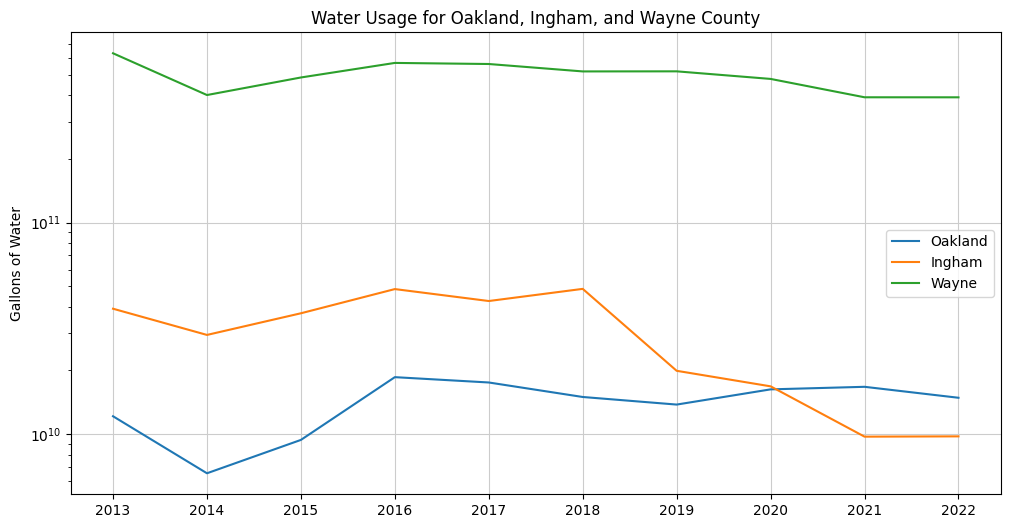

In [12]:
plt.figure(figsize=(12,6))
plt.plot(oakland_tas['year'], oakland_tas['total_gallons_all_sources'], label='Oakland')
plt.plot(ingham_tas['year'], ingham_tas['total_gallons_all_sources'], label='Ingham')
plt.plot(wayne_tas['year'], wayne_tas['total_gallons_all_sources'], label='Wayne')

plt.yscale('log')
plt.xticks(oakland_tas['year'])
plt.legend()
plt.grid(c='0.8')
plt.title('Water Usage for Oakland, Ingham, and Wayne County')
plt.ylabel("Gallons of Water")

Wayne County uses the most water here, which is expected as it has the largest population of the 3. From 2013-2017, Oakland and Ingham counties had similar trends (increasing and decreasing in similar times). From then onwards,  Oakland's water usage stayed relatively the same, while Ingham's decreased to below that of Oakland's since 2021.

Below, a more convulated plot that shows how each source of water fared.

Text(0.5, 1.0, 'Water Usage per Source')

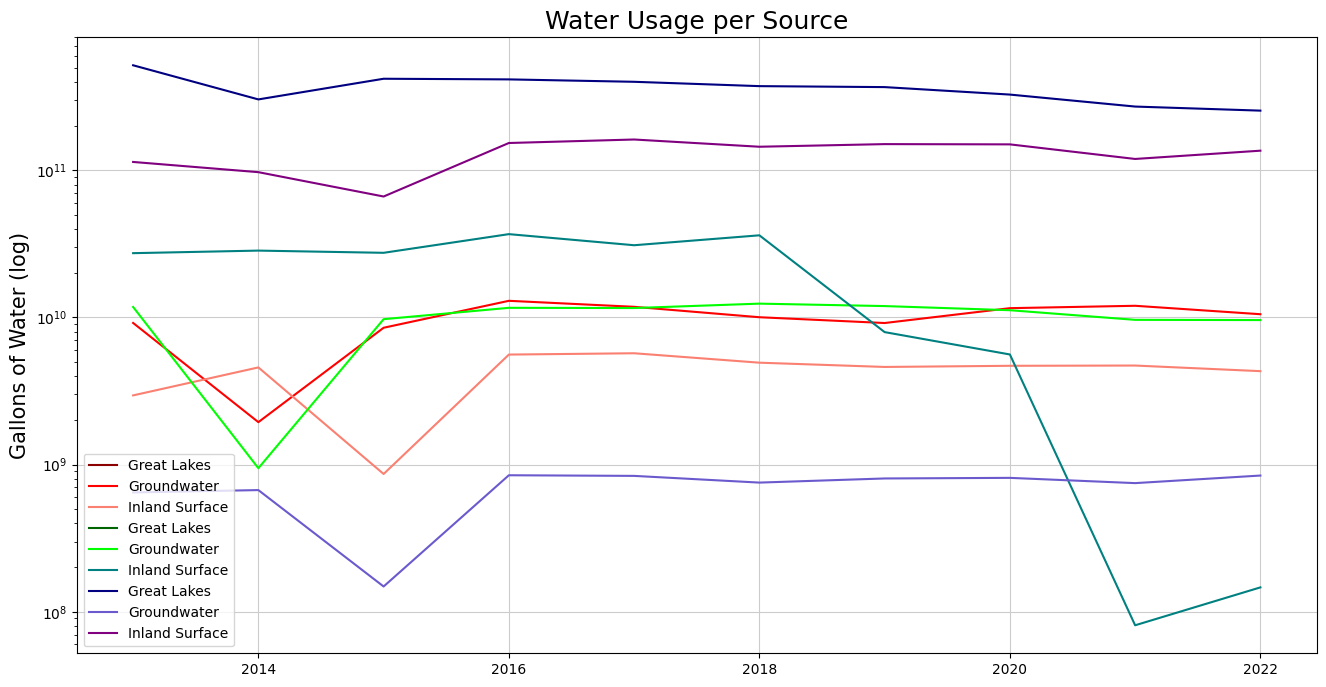

In [75]:
plt.figure(figsize=(16,8))
# Oakland County
plt.plot(oakland_tas['year'], oakland_tas['gallons_from_great_lakes'], label='Great Lakes', c='darkred')
plt.plot(oakland_tas['year'], oakland_tas['gallons_from_groundwater'], label='Groundwater', c='red')
plt.plot(oakland_tas['year'], oakland_tas['gallons_from_inland_surface'], label='Inland Surface', c='salmon')

# Ingham County
plt.plot(ingham_tas['year'], ingham_tas['gallons_from_great_lakes'], label='Great Lakes', c='darkgreen')
plt.plot(ingham_tas['year'], ingham_tas['gallons_from_groundwater'], label='Groundwater', c='lime')
plt.plot(ingham_tas['year'], ingham_tas['gallons_from_inland_surface'], label='Inland Surface', c='teal')

# Wayne
plt.plot(wayne_tas['year'], wayne_tas['gallons_from_great_lakes'], label='Great Lakes', c='navy')
plt.plot(wayne_tas['year'], wayne_tas['gallons_from_groundwater'], label='Groundwater', c='slateblue')
plt.plot(wayne_tas['year'], wayne_tas['gallons_from_inland_surface'], label='Inland Surface', c='purple')

plt.grid(c='0.8')
plt.legend()
plt.yscale('log')
plt.ylabel('Gallons of Water (log)', fontsize=15)
plt.title('Water Usage per Source', fontsize=18)

# Public Water Usage
First, create a mask "`public"` to focus on water usage for the public.

In [14]:
# Apply a mask to create a new dataframe focusing on the Public
public = data[data['industry']=='Public Water Supply']
#public

### *Oakland County*

In [27]:
oakland_public = public[public['county']=='Oakland'].sort_values('year')
oakland_public.iloc[:,[2,3,4,5,7]]

,gallons_from_great_lakes,gallons_from_groundwater,gallons_from_inland_surface,total_gallons_all_sources,year
4617,0,7424458594,0,7424458594,2013
586,0,6959257636,0,6959257636,2014
1297,0,6974648328,0,6974648328,2015
3953,0,7879791151,0,7879791151,2016
5945,0,7692822791,0,7692822791,2017
1961,0,7489040360,0,7489040360,2018
5281,0,7153251679,0,7153251679,2019
6609,0,7975141709,0,7975141709,2020
2625,0,7368009629,0,7368009629,2021
3289,0,7679390570,0,7679390570,2022


In **Oakland**, only *groundwater* is used for the public supply.

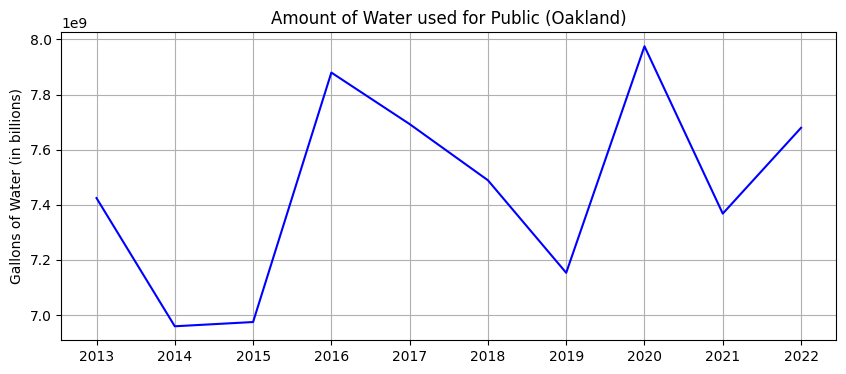

In [79]:
plt.figure(figsize=(10,4))
plt.plot(oakland_public['year'], oakland_public['total_gallons_all_sources'], c='b')
plt.xticks(oakland_public['year'])
plt.title('Amount of Water used for Public (Oakland)')
plt.ylabel('Gallons of Water (in billions)')
plt.grid()

### *Ingham*

In [81]:
ingham_public = public[public['county']=='Ingham'].sort_values('year')
ingham_public.iloc[:,[2,3,4,5,7]]

,gallons_from_great_lakes,gallons_from_groundwater,gallons_from_inland_surface,total_gallons_all_sources,year
4587,0,11352940209,0,11352940209,2013
584,0,10934819250,0,10934819250,2014
1267,0,9521244481,0,9521244481,2015
3923,0,11349464605,0,11349464605,2016
5915,0,11041309920,0,11041309920,2017
1931,0,11353736769,0,11353736769,2018
5251,0,10749729140,0,10749729140,2019
6579,0,10671840674,0,10671840674,2020
2595,0,9266716850,0,9266716850,2021
3259,0,9093673540,0,9093673540,2022


In **Ingham**, only *groundwater* is used for the public supply.

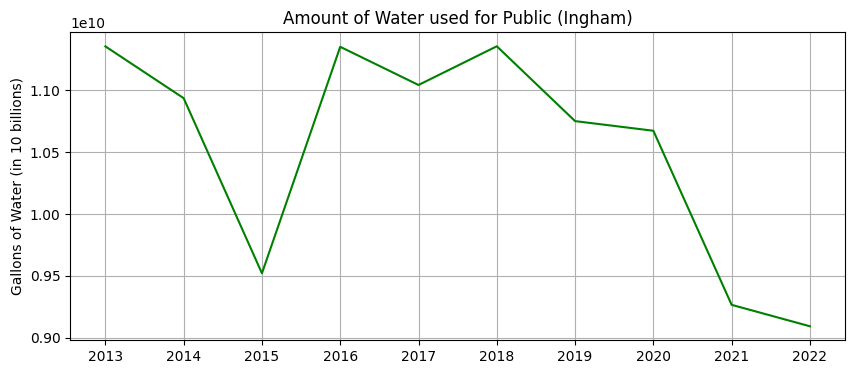

In [82]:
plt.figure(figsize=(10,4))
plt.plot(ingham_public['year'], ingham_public['total_gallons_all_sources'], c='g')
plt.xticks(ingham_public['year'])
plt.title('Amount of Water used for Public (Ingham)')
plt.ylabel('Gallons of Water (in 10 billions)')
plt.grid()

### *Wayne*

In [37]:
wayne_public = public[public['county']=='Wayne'].sort_values('year')
wayne_public.iloc[:,[2,3,4,5,7]]

,gallons_from_great_lakes,gallons_from_groundwater,gallons_from_inland_surface,total_gallons_all_sources,year
4636,199530690401,0,0,199530690401,2013
661,196202773000,0,0,196202773000,2014
1316,216539555739,0,0,216539555739,2015
3972,186867915000,0,0,186867915000,2016
5964,176522900000,0,0,176522900000,2017
1980,165821699999,0,0,165821699999,2018
5300,158255810000,0,0,158255810000,2019
6628,161178737000,0,0,161178737000,2020
2644,157495305000,0,0,157495305000,2021
3308,165199359000,0,0,165199359000,2022


Unlike the other 2 counties, **Wayne** sources their public water from the *Great Lakes*.

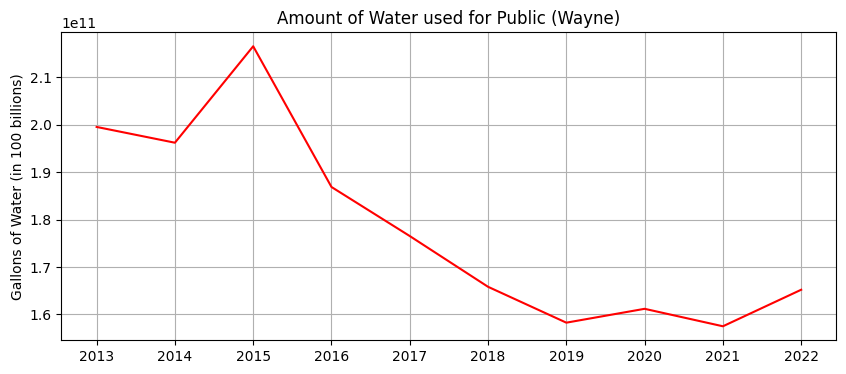

In [83]:
plt.figure(figsize=(10,4))
plt.plot(wayne_public['year'], wayne_public['total_gallons_all_sources'], c='r')
plt.xticks(wayne_public['year'])
plt.title('Amount of Water used for Public (Wayne)')
plt.ylabel('Gallons of Water (in 100 billions)')
plt.grid()

### All 3 Counties
There is a very large difference between the amount of water used in Wayne against the other two. A log-scaled plot is utilized.

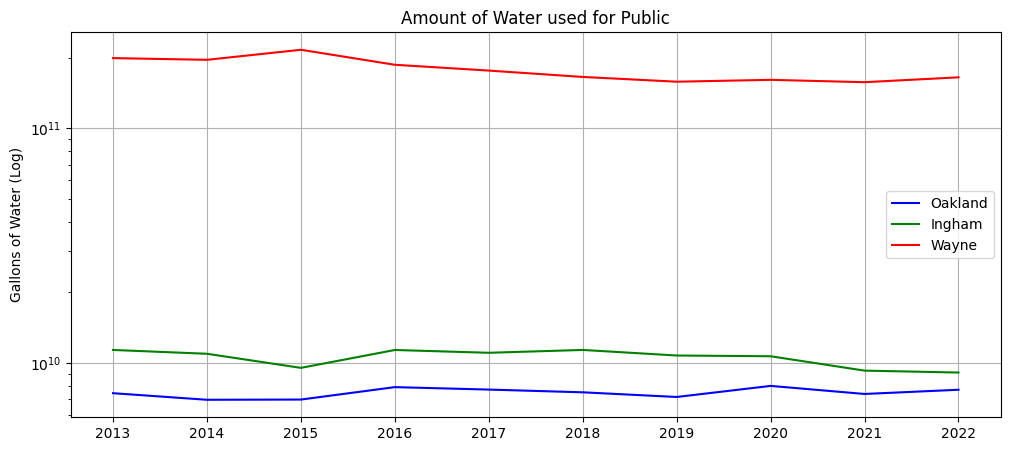

In [84]:
plt.figure(figsize=(12,5))
plt.plot(oakland_public['year'], oakland_public['total_gallons_all_sources'], label='Oakland', c='b')
plt.plot(ingham_public['year'], ingham_public['total_gallons_all_sources'], label='Ingham', c='g')
plt.plot(wayne_public['year'], wayne_public['total_gallons_all_sources'], label='Wayne', c='r')
plt.xticks(oakland_public['year'])
plt.title('Amount of Water used for Public')
plt.ylabel('Gallons of Water (Log)')
plt.yscale('log')
plt.legend()
plt.grid()